# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algoritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow import keras
import cv2
from skimage.io import imread

In [2]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [4]:
os.getcwd() + '\\data\\seg_train'

'c:\\Users\\Miguel Angel\\Documents\\23_04_Bootcamp_DS\\2304_dsft_thebridge\\3-Machine_Learning\\4-Deep_Learning\\2-Redes_Convolucionales\\ejercicios\\data\\seg_train'

In [8]:
IMAGE_SIZE = (32,32)
TRAIN_PATH = os.getcwd() + '\\data\\seg_train'
TEST_PATH = os.getcwd() + '\\data\\seg_test'

In [14]:
def read_data(path, im_size):
    X = []
    Y = []

    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path, folder)

    ##### CODE #####
    # Iterar sobre todo lo que haya en path
        for file in os.listdir(folder_path):
            
            # Leer la imagen a color y aplicarle el resize
            image_path = os.path.join(folder_path, file)
            image = imread(image_path)
            smallimage = cv2.resize(image, im_size)
            
            # Guardo en X
            X.append(smallimage)
            Y.append(label)

    return np.array(X), np.array(Y)
    

X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE)

print(X_train.shape)
print(X_test.shape)

(14034, 32, 32, 3)
(3000, 32, 32, 3)


In [15]:
pd.Series(y_train).value_counts(normalize=True)

0    0.178994
2    0.171298
1    0.169731
4    0.162035
5    0.161821
3    0.156121
dtype: float64

In [17]:
pd.Series(y_test).value_counts(normalize=True)

2    0.184333
0    0.175000
4    0.170000
1    0.167000
5    0.158000
3    0.145667
dtype: float64

In [20]:
y_train[0:200]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [21]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=10)
X_test, y_test = shuffle(X_test, y_test, random_state=10)

In [22]:
y_train[0:200]

array([3, 2, 1, 1, 2, 5, 0, 4, 3, 1, 1, 4, 5, 1, 4, 0, 4, 4, 3, 2, 0, 3,
       2, 1, 2, 0, 1, 1, 4, 4, 5, 2, 4, 0, 1, 4, 0, 5, 5, 0, 4, 1, 2, 4,
       3, 1, 4, 4, 4, 3, 1, 2, 2, 0, 0, 4, 3, 5, 2, 0, 0, 2, 1, 4, 5, 0,
       1, 3, 0, 3, 1, 4, 5, 5, 0, 3, 1, 2, 0, 1, 4, 2, 3, 4, 0, 0, 2, 3,
       4, 2, 3, 0, 4, 2, 2, 2, 3, 1, 2, 3, 1, 1, 2, 0, 4, 1, 3, 0, 3, 4,
       3, 3, 0, 3, 4, 3, 0, 2, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 0, 1, 0, 5,
       0, 3, 0, 0, 0, 5, 3, 2, 3, 3, 4, 1, 2, 1, 0, 1, 5, 4, 1, 2, 2, 4,
       2, 3, 2, 2, 4, 5, 1, 5, 1, 5, 0, 4, 0, 1, 2, 4, 5, 3, 0, 4, 2, 3,
       4, 1, 2, 2, 0, 1, 4, 1, 2, 2, 4, 4, 5, 5, 4, 1, 5, 3, 3, 2, 2, 0,
       2, 0])

forest


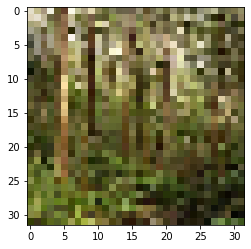

In [93]:
index = np.random.randint(X_train.shape[0])
print(class_names[y_train[index]])
plt.imshow(X_train[index]);

In [94]:
print(X_train.min())
print(X_train.max())


0
255


In [95]:
X_train = X_train/255
X_test = X_test/255

In [96]:
print(X_train.min())
print(X_train.max())


0.0
1.0


In [97]:
X_train.shape

(14034, 32, 32, 3)

In [108]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(6, activation='softmax')
])

In [109]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1152)              0         
                                                                 
 dense_6 (Dense)             (None, 32)               

In [102]:
64*(3*3)*3 + 64

1792

In [110]:
32*(3*3)*64 + 32

18464

In [113]:
6*6*32*32 + 32

36896

In [114]:
32 *  6 + 6

198

In [115]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [116]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
88/88 [==============================] - 14s 151ms/step - loss: 1.2992 - accuracy: 0.4850 - val_loss: 1.1077 - val_accuracy: 0.5639
Epoch 2/20
88/88 [==============================] - 14s 163ms/step - loss: 1.0200 - accuracy: 0.6075 - val_loss: 0.9963 - val_accuracy: 0.6181
Epoch 3/20
88/88 [==============================] - 13s 151ms/step - loss: 0.9517 - accuracy: 0.6377 - val_loss: 1.0010 - val_accuracy: 0.6049
Epoch 4/20
88/88 [==============================] - 14s 159ms/step - loss: 0.8772 - accuracy: 0.6713 - val_loss: 0.8887 - val_accuracy: 0.6755
Epoch 5/20
88/88 [==============================] - 14s 160ms/step - loss: 0.8323 - accuracy: 0.6892 - val_loss: 0.8466 - val_accuracy: 0.6929
Epoch 6/20
88/88 [==============================] - 14s 158ms/step - loss: 0.8134 - accuracy: 0.7019 - val_loss: 0.8541 - val_accuracy: 0.6758
Epoch 7/20
88/88 [==============================] - 14s 164ms/step - loss: 0.7937 - accuracy: 0.7101 - val_loss: 0.8286 - val_accuracy: 0.6990

In [117]:
df_hist = pd.DataFrame(history.history)
df_hist

,loss,accuracy,val_loss,val_accuracy
0,1.299167,0.484992,1.107724,0.563947
1,1.020007,0.607464,0.996296,0.618098
2,0.951706,0.637748,1.000984,0.604916
3,0.877205,0.671328,0.888670,0.675454
4,0.832307,0.689231,0.846638,0.692911
5,0.813350,0.701879,0.854125,0.675810
6,0.793658,0.710074,0.828650,0.698967
7,0.748888,0.725483,0.802223,0.703598
8,0.737313,0.732698,0.792574,0.710367
9,0.710449,0.745079,0.907527,0.664054


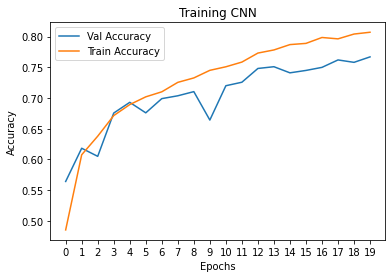

In [120]:
plt.plot(df_hist['val_accuracy'], label="Val Accuracy")
plt.plot(df_hist['accuracy'], label = "Train Accuracy")
plt.title("Training CNN")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.xticks(np.arange(0,20))
plt.legend()

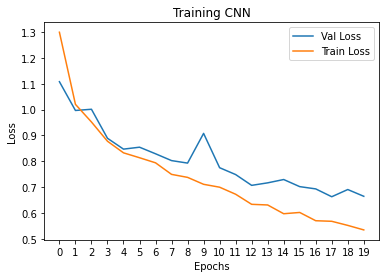

In [121]:
plt.plot(df_hist['val_loss'], label="Val Loss")
plt.plot(df_hist['loss'], label = "Train Loss")
plt.title("Training CNN")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.xticks(np.arange(0,20))
plt.legend()

In [122]:
results = model.evaluate(X_test, y_test)
results

94/94 [==============================] - 1s 13ms/step - loss: 0.6494 - accuracy: 0.7567


[0.649420440196991, 0.7566666603088379]

In [124]:
y_pred = model.predict(X_test)
y_pred.round(2)

array([[0.9 , 0.  , 0.03, 0.  , 0.07, 0.  ],
       [0.01, 0.19, 0.03, 0.75, 0.01, 0.01],
       [0.08, 0.  , 0.79, 0.  , 0.12, 0.  ],
       ...,
       [0.19, 0.07, 0.66, 0.02, 0.04, 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.25, 0.02, 0.58, 0.01, 0.13, 0.  ]], dtype=float32)

In [126]:
pred_labels = np.argmax(y_pred, axis=1)
pred_labels

array([0, 3, 2, ..., 2, 5, 2], dtype=int64)

In [127]:
label_pred = [class_names[pred] for pred in pred_labels]
label_pred

['mountain',
 'buildings',
 'glacier',
 'sea',
 'forest',
 'mountain',
 'glacier',
 'glacier',
 'sea',
 'street',
 'buildings',
 'sea',
 'sea',
 'buildings',
 'street',
 'sea',
 'glacier',
 'mountain',
 'glacier',
 'buildings',
 'buildings',
 'glacier',
 'buildings',
 'glacier',
 'buildings',
 'glacier',
 'sea',
 'buildings',
 'forest',
 'forest',
 'mountain',
 'sea',
 'glacier',
 'glacier',
 'sea',
 'mountain',
 'street',
 'mountain',
 'sea',
 'forest',
 'forest',
 'buildings',
 'glacier',
 'street',
 'glacier',
 'mountain',
 'buildings',
 'mountain',
 'glacier',
 'glacier',
 'forest',
 'street',
 'sea',
 'glacier',
 'glacier',
 'glacier',
 'forest',
 'sea',
 'glacier',
 'forest',
 'mountain',
 'glacier',
 'glacier',
 'forest',
 'buildings',
 'buildings',
 'sea',
 'glacier',
 'mountain',
 'sea',
 'forest',
 'mountain',
 'mountain',
 'sea',
 'glacier',
 'street',
 'street',
 'buildings',
 'sea',
 'forest',
 'glacier',
 'sea',
 'mountain',
 'street',
 'glacier',
 'street',
 'glacier',
 

In [129]:
class_names

['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']

<AxesSubplot:>

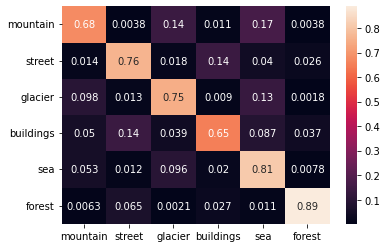

In [133]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

c_mat = confusion_matrix(y_test, pred_labels, normalize='true')
sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)